<a href="https://colab.research.google.com/github/gawayne29/gawayneLessons/blob/main/newFiles/Chills_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import NumPy for numerical operations with an alias
# Import the librosa library for audio analysis and processing
# Import the display module from librosa to visualize the audio data
# Import Matplotlib for creating plots with an alias
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
# Clone Github repository
!git clone https://github.com/jcdevaney/gawayneLessons.git

fatal: destination path 'gawayneLessons' already exists and is not an empty directory.


In [ ]:
# Define a dictionary "audio_files_with_names" where each key-value pair represents a path to an audio file and its corresponding custom name
audio_files_with_names = {
    '/Users/gcportable/Documents/GitHub/gawayneLessons/files/Zaini - Wherever you would call me - TRIM.wav': 'Zaini - Wherever you would call me',
    '/Users/gcportable/Documents/GitHub/gawayneLessons/files/Zaini - Wherever you would call me - VOCALS - TRIM.wav': 'Zaini - Wherever you would call me - VOCALS',
    '/Users/gcportable/Documents/GitHub/gawayneLessons/files/Michael - Jackson Earth Song - TRIM.wav': 'Michael Jackson - Earth Song',
    '/Users/gcportable/Documents/GitHub/gawayneLessons/files/Michael - Jackson Earth Song - VOCALS - TRIM.wav': 'Michael Jackson - Earth Song  - VOCALS',
    '/Users/gcportable/Documents/GitHub/gawayneLessons/files/Israel IZ Kamakawiwoʻole - Somewhere over the Rainbow - TRIM.wav': 'Israel IZ Kamakawiwoʻole - Somewhere over the Rainbow',
    '/Users/gcportable/Documents/GitHub/gawayneLessons/files/Israel IZ Kamakawiwoʻole - Somewhere over the Rainbow - VOCALS - TRIM.wav': 'Israel IZ Kamakawiwoʻole - Somewhere over the Rainbow - VOCALS',
}

ITERATION 1: Zaini - Wherever you would call me


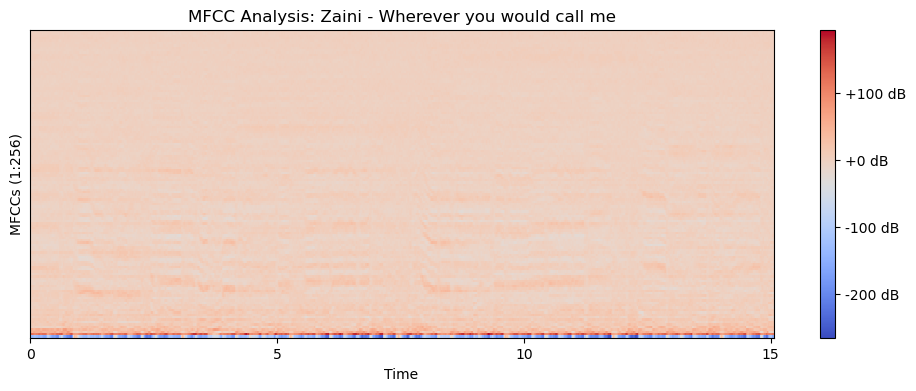

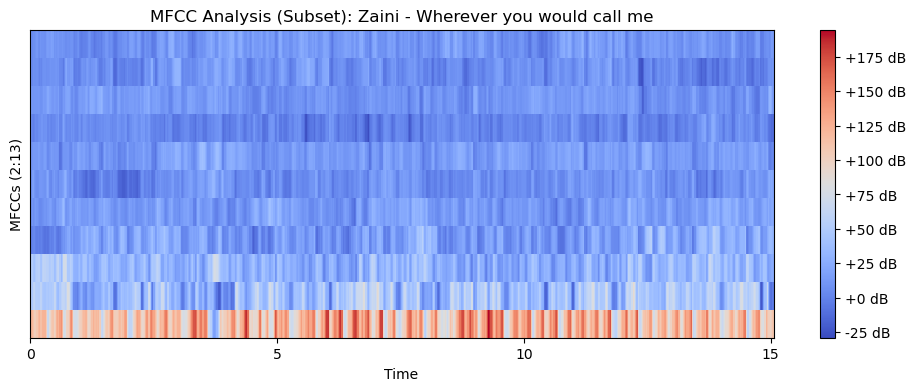

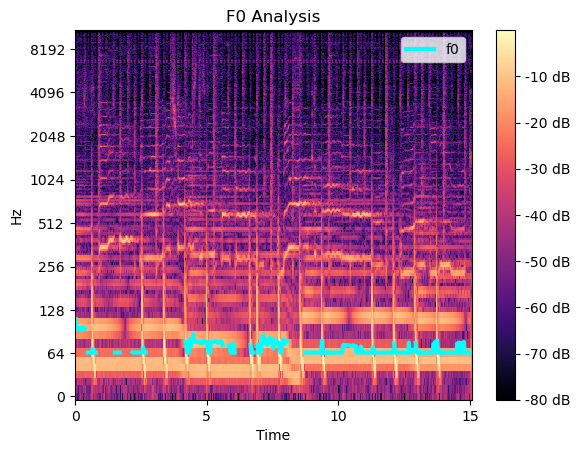

Estimated onsets:
[ 0.032       0.096       0.23466667  0.36266667  0.50133333  0.62933333
  0.77866667  0.90666667  1.184       1.32266667  1.45066667  1.58933333
  1.728       1.86666667  1.99466667  2.144       2.272       2.41066667
  2.48533333  2.54933333  2.688       2.816       2.95466667  3.09333333
  3.232       3.36        3.49866667  3.63733333  3.91466667  4.05333333
  4.18133333  4.32        4.448       4.72533333  4.864       5.00266667
  5.14133333  5.26933333  5.41866667  5.54666667  5.68533333  5.81333333
  5.952       6.09066667  6.22933333  6.35733333  6.50666667  6.63466667
  6.77333333  6.90133333  7.05066667  7.17866667  7.31733333  7.456
  7.59466667  7.72266667  7.86133333  7.94666667  8.          8.27733333
  8.45866667  8.544       8.68266667  8.82133333  8.96        9.01333333
  9.088       9.22666667  9.36533333  9.504       9.632       9.78133333
  9.90933333 10.048      10.176      10.32533333 10.45333333 10.592
 10.73066667 10.86933333 10.99733333 11.136

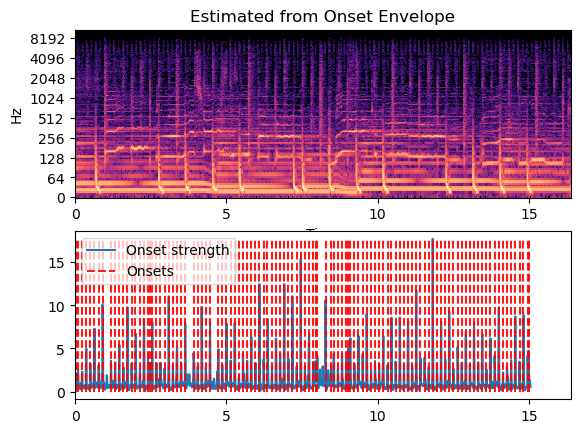

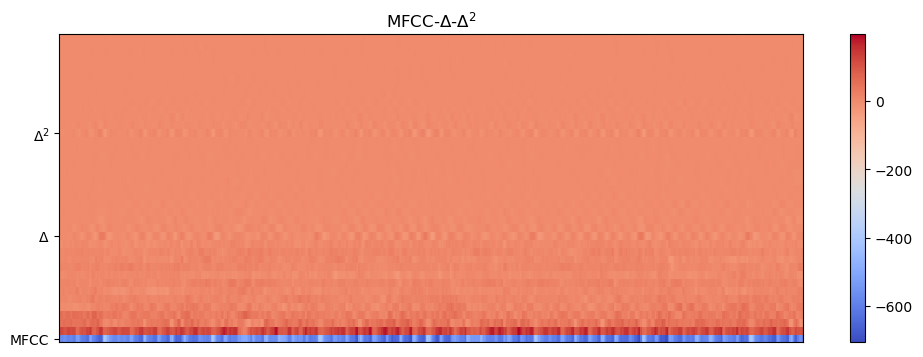

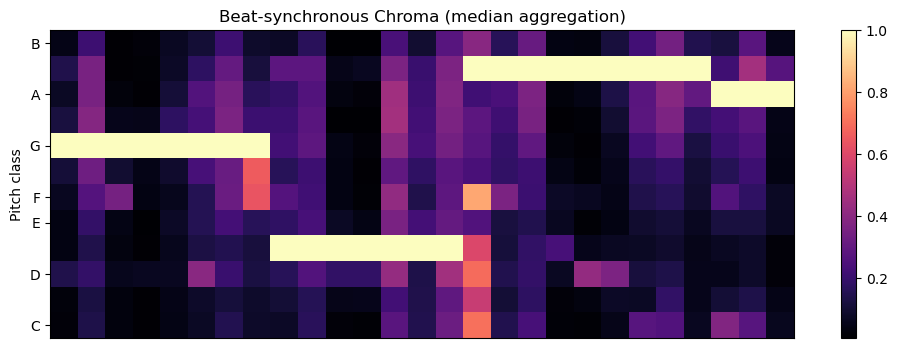

ITERATION 2: Zaini - Wherever you would call me - VOCALS


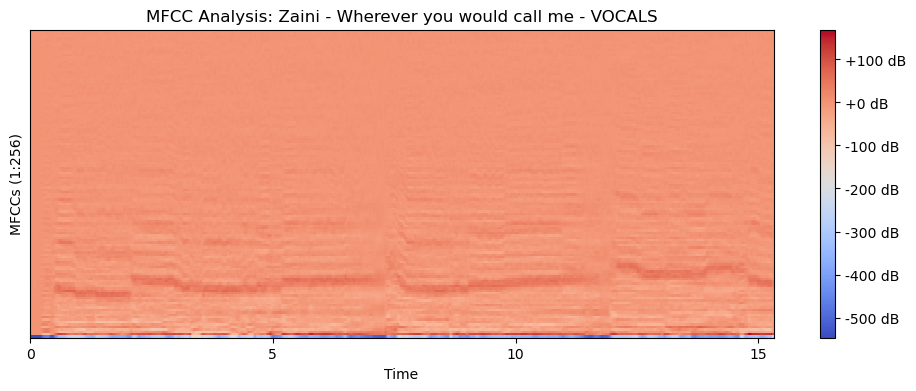

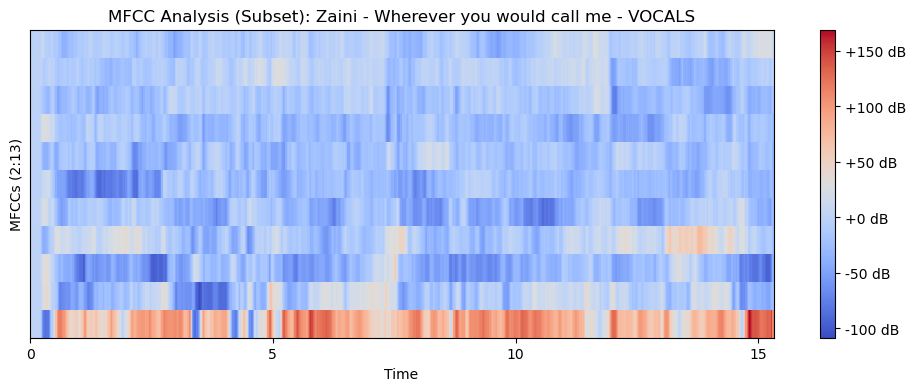

In [ ]:

# Defines a function named chills_analysis that takes a dictionary "audio_files" as input.
# Iterates over the items in the "audio_files" dictionary using enumerate to get both the index (i) and (audio_file, custom_name)
# Starts the index from 1
# Separator - The print function outputs of the string resulting in a line of 40 '=' characters
# Prints information about the current iteration, including the iteration number (i) and the custom name of the audio file
# Separator 2 - The print function outputs of the string resulting in a line of 40 '=' characters.
# Calls the "analyze_and_plot" function with the current "audio_file" and "custom_name" as arguments.
def chills_analysis(audio_files):
    for i, (audio_file, custom_name) in enumerate(audio_files.items(), start=1):
        print(f'{"="*40}')
        print(f'{"ITERATION"} {i}: {custom_name}')
        print(f'{"="*40}')
        analyze_and_plot(audio_file, custom_name)


# Load the audio file using Librosa.
# Calculate the MFCC
# Display the full MFCCs and subsets using Matplotlib
# Call a function (analyze_audio) to extract its audio features, including F0
# Plot and display the f0 using the function (plot_audio_vals)
# Call a function get_onsets_wrapper to estimate onset frames in the audio.
# Store the onset frames in the audio_vals dictionary.
# Call a function (beat_tracking) to perform beat tracking on the audio
def analyze_and_plot(audio_file, custom_name):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # MFCC analysis
    hop_length = 512
    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=256)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCCs (1:256)')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCC Analysis: {custom_name}')
    plt.show()

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfcc[1:12, :], x_axis='time')
    plt.ylabel('MFCCs (2:13)')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCC Analysis (Subset): {custom_name}')  # Changed this line
    plt.show()

    # F0 analysis
    audio_vals = analyze_audio(audio_file) ###
    plot_audio_vals(audio_vals, audio_file, 'F0 Analysis', 'f0') ###

    # Onsets analysis
    audio_vals['onset_frames'] = get_onsets_wrapper(audio_file) ###

    # Beat tracking
    beat_tracking(audio_file) ###

    return mfcc


# Load the audio file using Librosa
# Calculate the spectral centroid, bandwidth, contrast, and flatness features of the audio signal using Librosa
# Store these features in the audio_vals dictionary
# Use the PYIN pitch detection to estimate the pitch (F0) of the audio
# Calculate the pitch and store it in the audio_vals dictionary
# Return the audio_vals dictionary containing the extracted audio features

def analyze_audio(audio_path):
    audio_vals = {}
    y, sr = librosa.load(audio_path)
    audio_vals['specCent'] = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=2048, hop_length=512, freq=None)
    audio_vals['specBand'] = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=2048, hop_length=512, freq=None)
    audio_vals['specContrast'] = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=2048, hop_length=512, freq=None)
    audio_vals['specFlatness'] = librosa.feature.spectral_flatness(y=y)

    audio_vals['f0'], _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    audio_vals['f0mean'] = np.nanmean(audio_vals['f0'])

    return audio_vals

# Load the audio file using Librosa
# Create a time vector (times) that corresponds to the audio feature values
# Calculate the spectrogram of the audio signal using the Short-Time Fourier Transform (STFT)
# Create a new Matplotlib figure for plotting, Display the spectrogram using librosa.display.specshow, Set the plot title and colorbar
# Plot the audio feature values on top of the spectrogram, Display a legend indicating the type of feature
# Display the final plot
def plot_audio_vals(audio_vals, audio_path, plot_title, data_name):
    y, sr = librosa.load(audio_path)
    times = librosa.times_like(audio_vals[data_name])
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
    ax.set(title=plot_title)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    ax.plot(times, audio_vals[data_name], label=data_name, color='cyan', linewidth=3)
    ax.legend(loc='upper right')
    plt.show()


# Load the audio file using Librosa.
# Call a separate function get_onsets_env" to estimate onset frames using Librosa's onset detection algorithm
# Print the estimated onset times in seconds, Return the onset frames
def get_onsets_wrapper(filename):
    sig, sr = librosa.load(filename, mono=True, sr=None)
    onset_frames = get_onsets_env(sig, sr)
    print('Estimated onsets:')
    print(librosa.frames_to_time(onset_frames, sr=sr))

    return onset_frames

# Load the audio file using Librosa.
# Compute the mel spectrogram of the harmonic component of the audio signal, Convert the mel spectrogram to decibels,
# Compute the MFCCs from the spectrogram, Calculate the first and second order deltas of the MFCCs
# Separate the audio signal into harmonic and percussive components using HPSS
# Compute the chroma feature for the harmonic component of the audio signal
# Use Librosa's beat tracking algorithm to estimate the tempo and beat frames from the percussive component
# Display the MFCCs, their first and second order deltas, along with the beat-synchronous chroma feature
# Return temp and beats

def beat_tracking(filename):
    y, sr = librosa.load(filename)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

    y_harmonic, y_percussive = librosa.effects.hpss(y)
    C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

    tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(M)
    plt.title('MFCC-$\Delta$-$\Delta^2$')
    plt.yticks(np.arange(0, M.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])
    plt.colorbar()
    plt.show()

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(librosa.util.sync(C, beats, aggregate=np.median), y_axis='chroma')
    plt.title('Beat-synchronous Chroma (median aggregation)')
    plt.colorbar()
    plt.show()

    return tempo, beats

# Calculate the onset envelope of the input audio signal using Librosa's onset strength function
# Convert frame indices to time values, Detect onset frames from the onset envelope
# Compute the STFT of the audio signal, Display the log amplitude spectrogram of the audio signal.
# Plot the onset strength curve and highlight the detected onset
# Return the estimated onset frames

def get_onsets_env(sig, sr=44100):
    o_env = librosa.onset.onset_strength(y=sig, sr=sr)
    times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

    D = np.abs(librosa.stft(sig, n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), hop_length=512, x_axis='time', y_axis='log')
    plt.title('Estimated from Onset Envelope')
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.plot(times, o_env, label='Onset strength')
    plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)

    return onset_frames

# Load the audio file specified by the filename using Librosa, ensuring it's in mono format (mono=True) and obtaining the original sampling rate (sr)
# Call the "get_onsets_env" function to estimate onset frames from the loaded audio signal
# Print the estimated onset times converted from frames to time using Librosa's frames_to_time function

def getOnsetsWrapper(filename):
    sig , sr = librosa.load(filename,mono=True,sr=None)

    # estimate onsets from an onset envelope
    onset_frames = get_onsets_env(sig,sr)
    print('Estimated onsets:')
    print(librosa.frames_to_time(onset_frames, sr=sr))

# Chills_analysis function takes a collection of audio files, each associated with a custom name
# It goes through each file, analyzes its audio features, and creates plots to visualize the characteristics
# It prints information for each analysis iteration, like the custom name and iteration number
# Overall, it's a tool to quickly analyze and compare multiple audio files, showcasing their unique traits
chills_analysis(audio_files_with_names)
